In [39]:
%matplotlib inline

## Imports

In [40]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
import matplotlib.pyplot as plt
import random

## Idea:

### Create an equal superposition state by applying Hadamard gates to each qubit in the string

In [41]:
def generate_rng_circuit(num_qubits):
    qc = QuantumCircuit(num_qubits, num_qubits)
    qc.h(range(num_qubits))
    qc.barrier()
    qc.measure(range(num_qubits), range(num_qubits))
    return qc

## Visualizing Circuit

In [42]:
def visualize_circuit(qc):
    qc.draw(output='mpl')
    plt.show()

## Idea:

### 1. No. of possible outcomes <= No. of superposition states = 2 ^ No. of qubits

### 2. Run the circuit for 1024 shots

### 3. Discard the shots where the measured outcome is not in range

### 4. Randomly choose an outcome from the remaining set (this is purely classical)

In [48]:
def get_random_number(start, stop, step, shots=1024):
    range_length = max(0, (stop - start + step + (-1 if step > 0 else 1)) // step)
    num_qubits = (range_length - 1).bit_length()
    rng = generate_rng_circuit(num_qubits)
    visualize_circuit(rng)

    backend = AerSimulator()
    pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
    isa_rng = pm.run(rng)

    job = backend.run(isa_rng, shots=shots, memory=True)
    result = job.result()

    counts = result.get_counts()
    outcomes = {}

    for key in counts:
        num = int(key, 2)
        if num < range_length:
            outcomes[start + num * step] = counts[key]
    
    plot_histogram(outcomes, legend=[f'{num_qubits}-qubit equal superposition state'], figsize=(6,4))
    plt.show()

    memory = result.get_memory()
    outcome_memory = []

    for bitstring in memory:
        num = int(bitstring, 2)
        if num < range_length:
            outcome_memory.append(start + num * step)
    num_outcomes = len(outcome_memory)

    return outcome_memory[random.randint(0, num_outcomes - 1)]

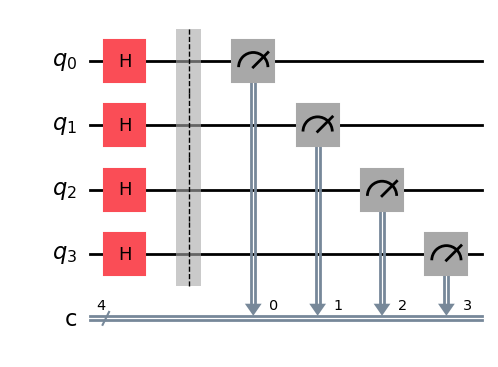

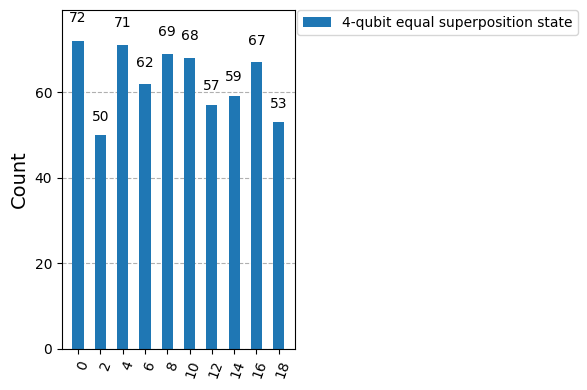

Random Outcome:  8


In [50]:
num = get_random_number(0, 20, 2)
print("Random Outcome: ", num)